## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.


FIt-SNE repository not detected. Functionality will be disabled.


/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [9]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')

In [10]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1652, 500)

In [11]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1653, 500)

In [12]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [13]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

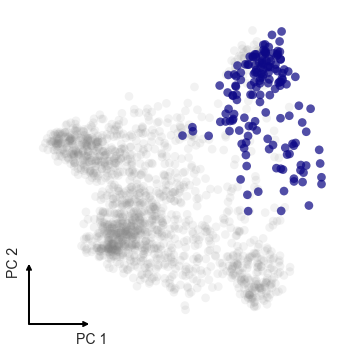

In [22]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['5']) # rods & cones

In [23]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_PCA2.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.5982
EMD: 0.2443
KLD: 0.1621
Knn Pres.: 79.6171
CPU times: user 395 ms, sys: 36.8 ms, total: 432 ms
Wall time: 450 ms


CPU times: user 18.5 s, sys: 516 ms, total: 19 s
Wall time: 18.9 s


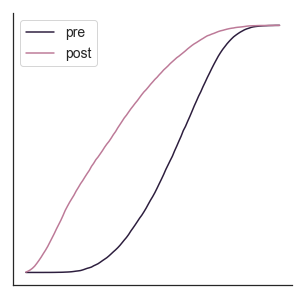

<Figure size 504x504 with 0 Axes>

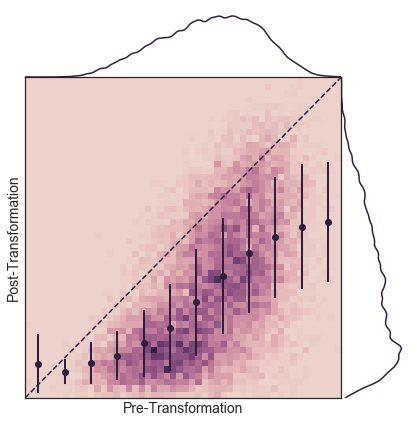

In [24]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

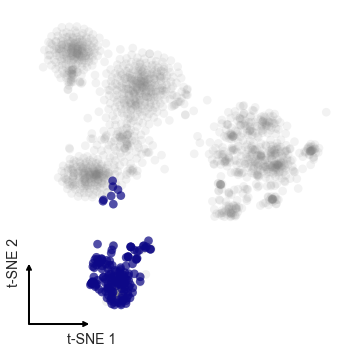

In [25]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [26]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_tSNE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.5562
EMD: 0.3328
KLD: 0.1689
Knn Pres.: 84.5842
CPU times: user 372 ms, sys: 23.7 ms, total: 396 ms
Wall time: 415 ms


CPU times: user 18.3 s, sys: 554 ms, total: 18.9 s
Wall time: 18.7 s


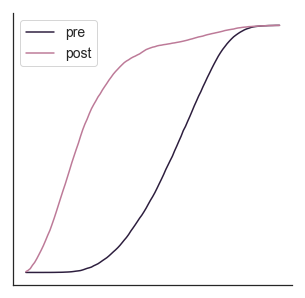

<Figure size 504x504 with 0 Axes>

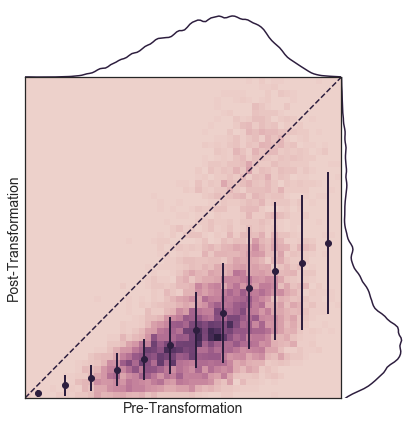

In [27]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

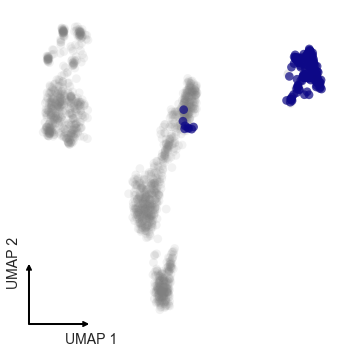

In [28]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_UMAP.plot_barcodes(ranks=['5']) # rods & cones

In [29]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_UMAP.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.3954
EMD: 0.4252
KLD: 0.4752
Knn Pres.: 82.3495
CPU times: user 386 ms, sys: 24.3 ms, total: 410 ms
Wall time: 423 ms


CPU times: user 18.4 s, sys: 564 ms, total: 19 s
Wall time: 19 s


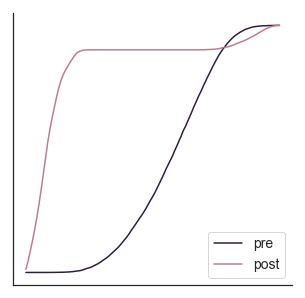

<Figure size 504x504 with 0 Axes>

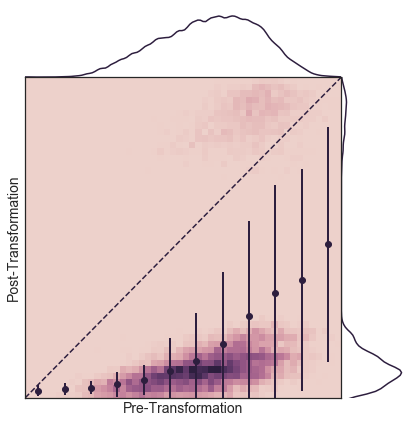

In [30]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

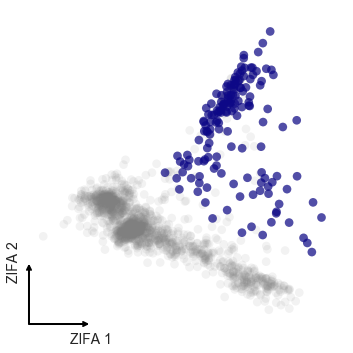

In [31]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_ZIFA.plot_barcodes(ranks=['5']) # rods & cones

In [32]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_ZIFA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_ZIFA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.5636
EMD: 0.2862
KLD: 0.1894
Knn Pres.: 77.686
CPU times: user 376 ms, sys: 22.1 ms, total: 398 ms
Wall time: 403 ms


CPU times: user 18.7 s, sys: 600 ms, total: 19.3 s
Wall time: 19.5 s


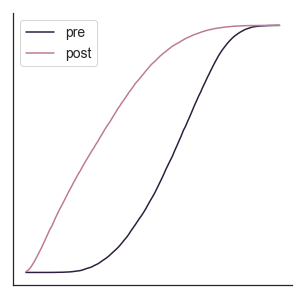

<Figure size 504x504 with 0 Axes>

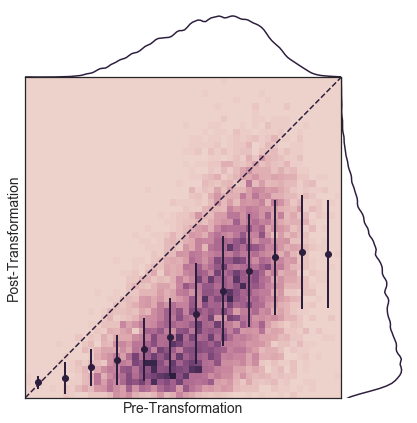

In [33]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cone55s_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

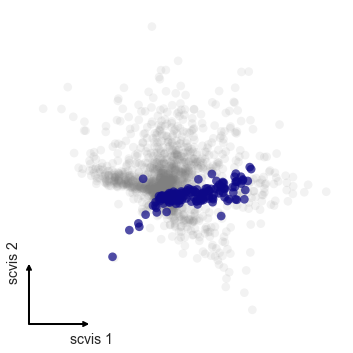

In [34]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scvis.plot_barcodes(ranks=['5']) # rods & cones

In [35]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_scvis.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_scvis.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.7637
EMD: 0.0605
KLD: 0.1104
Knn Pres.: 85.4444
CPU times: user 338 ms, sys: 13.7 ms, total: 352 ms
Wall time: 357 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.1 s, sys: 532 ms, total: 18.6 s
Wall time: 18.8 s


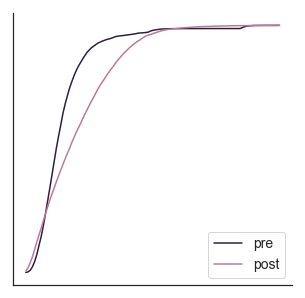

<Figure size 504x504 with 0 Axes>

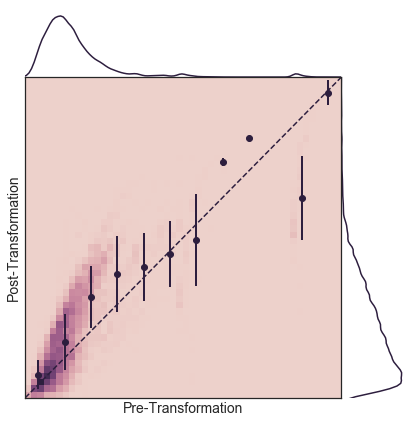

In [36]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

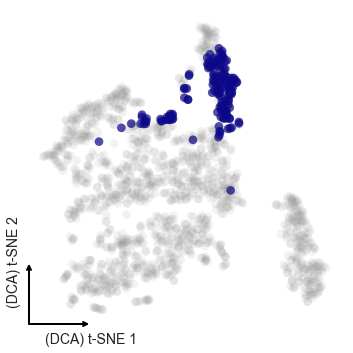

In [37]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv.gz', name='DCA', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_DCA_tSNE = DR.from_file('pymethods_out/retina_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_DCA_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [38]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_DCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_DCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4228
EMD: 0.1885
KLD: 0.1965
Knn Pres.: 77.7281
CPU times: user 395 ms, sys: 15 ms, total: 410 ms
Wall time: 416 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.3 s, sys: 511 ms, total: 18.8 s
Wall time: 18.7 s


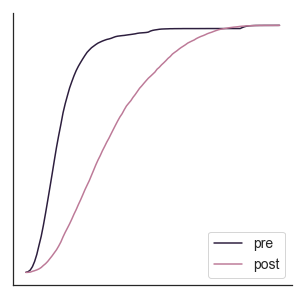

<Figure size 504x504 with 0 Axes>

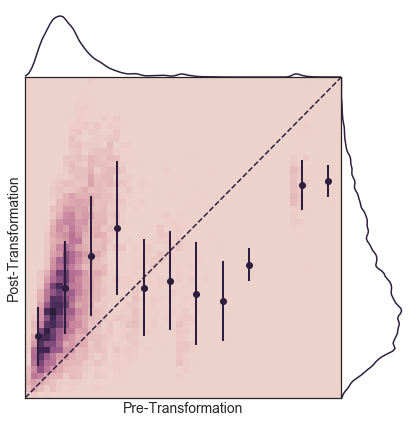

In [39]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

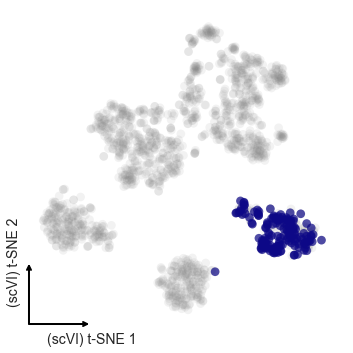

In [40]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [41]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_scVI.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_scVI.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.3149
EMD: 0.2672
KLD: 0.2107
Knn Pres.: 75.6283
CPU times: user 357 ms, sys: 17.3 ms, total: 374 ms
Wall time: 380 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.3 s, sys: 554 ms, total: 18.9 s
Wall time: 18.8 s


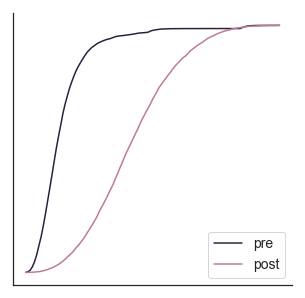

<Figure size 504x504 with 0 Axes>

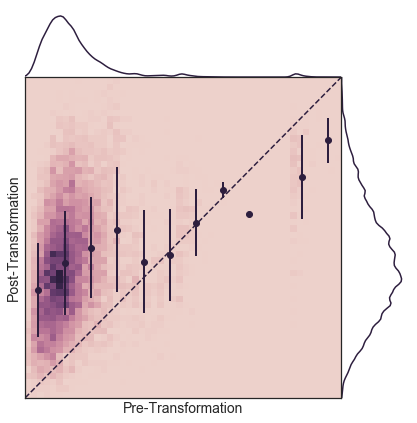

In [42]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

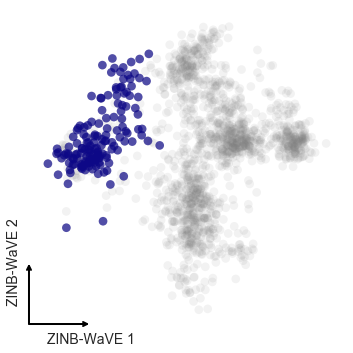

In [43]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv.gz', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['5']) # rods & cones

In [44]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_ZINBWAVE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINBWAVE'], final_distance_stats['Retina']['EMD']['ZINBWAVE'], final_distance_stats['Retina']['KLD']['ZINBWAVE'], final_distance_stats['Retina']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.1919
EMD: 0.1009
KLD: 0.3645
Knn Pres.: 71.5888
CPU times: user 348 ms, sys: 15.3 ms, total: 363 ms
Wall time: 374 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.3 s, sys: 623 ms, total: 19 s
Wall time: 19.3 s


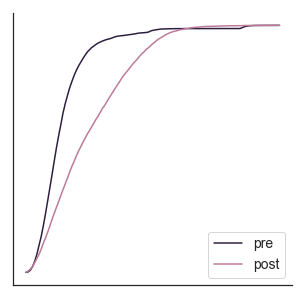

<Figure size 504x504 with 0 Axes>

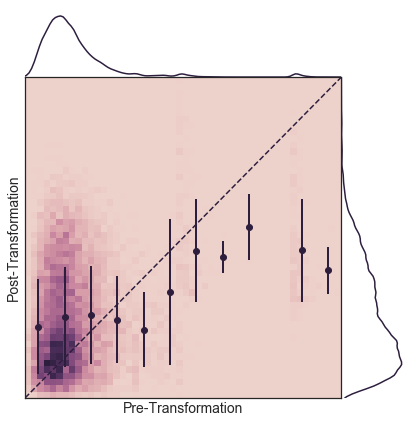

In [45]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

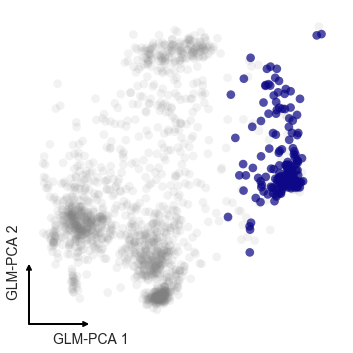

In [46]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv.gz', name='GLM-PCA', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_GLMPCA.plot_barcodes(ranks=['5']) # rods & cones

In [47]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_GLMPCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLMPCA'], final_distance_stats['Retina']['EMD']['GLMPCA'], final_distance_stats['Retina']['KLD']['GLMPCA'], final_distance_stats['Retina']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.2961
EMD: 0.0825
KLD: 0.3655
Knn Pres.: 72.6598
CPU times: user 422 ms, sys: 15.4 ms, total: 438 ms
Wall time: 452 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.1 s, sys: 592 ms, total: 18.7 s
Wall time: 18.8 s


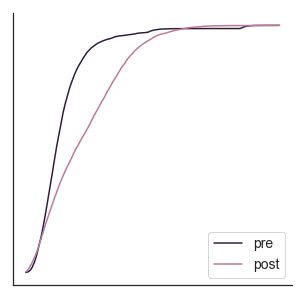

<Figure size 504x504 with 0 Axes>

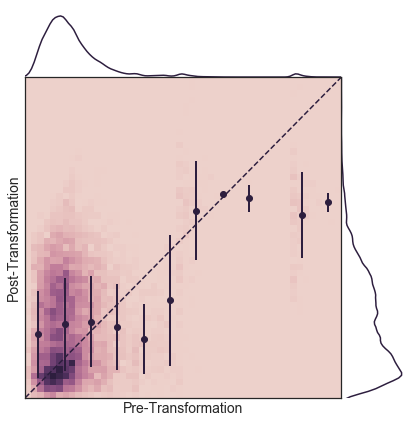

In [48]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

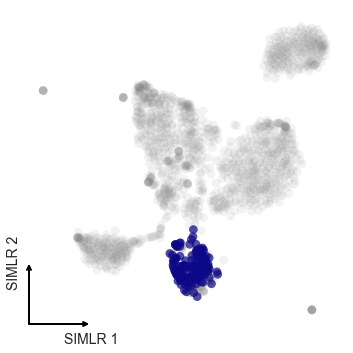

In [49]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_SIMLR_2D = DR.from_file('Rmethods_out/retina_SIMLR_ydata.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_SIMLR_2D.plot_barcodes(ranks=['5']) # rods & cones

In [50]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_SIMLR.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_scVI.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.167
EMD: 0.26
KLD: 0.2651
Knn Pres.: 75.6283
CPU times: user 348 ms, sys: 15.7 ms, total: 364 ms
Wall time: 371 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.4 s, sys: 597 ms, total: 19 s
Wall time: 19.1 s


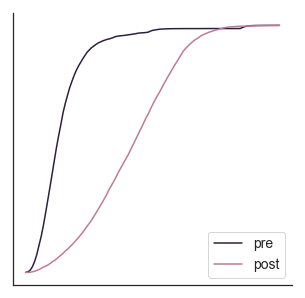

<Figure size 504x504 with 0 Axes>

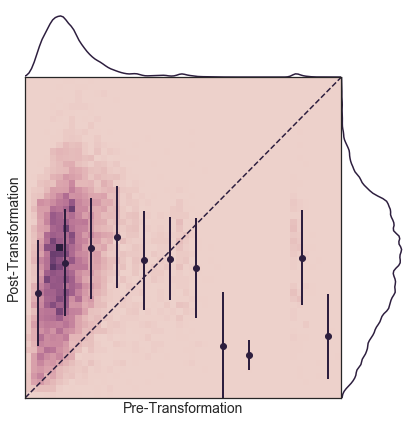

In [51]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

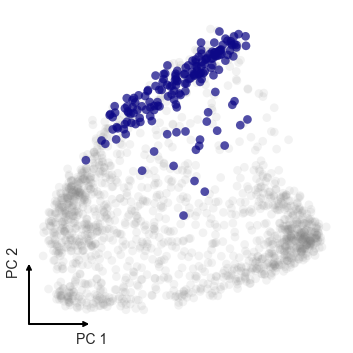

In [57]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3']) # mature goblet cells

In [58]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.8724
EMD: 0.0574
KLD: 0.0965
Knn Pres.: 89.5087
CPU times: user 436 ms, sys: 34.5 ms, total: 471 ms
Wall time: 479 ms


CPU times: user 18.3 s, sys: 536 ms, total: 18.9 s
Wall time: 18.9 s


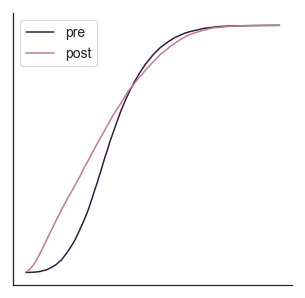

<Figure size 504x504 with 0 Axes>

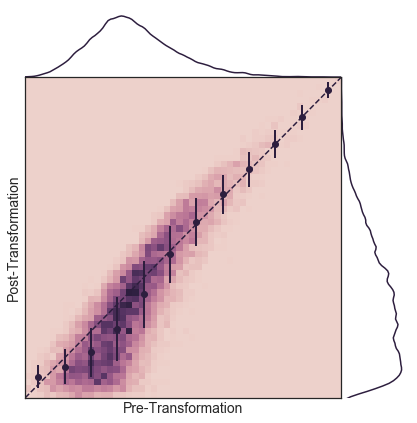

In [59]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

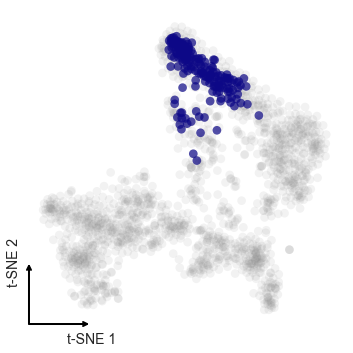

In [60]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [61]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.8572
EMD: 0.0581
KLD: 0.089
Knn Pres.: 88.4014
CPU times: user 435 ms, sys: 22.9 ms, total: 458 ms
Wall time: 468 ms


CPU times: user 18.3 s, sys: 456 ms, total: 18.8 s
Wall time: 18.6 s


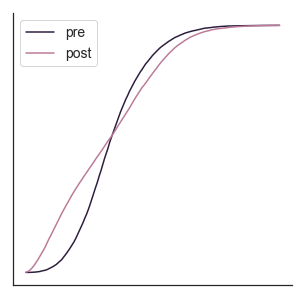

<Figure size 504x504 with 0 Axes>

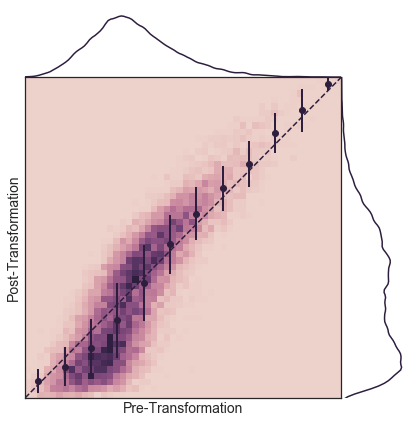

In [62]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

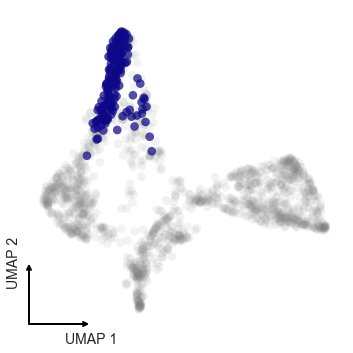

In [63]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [64]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.8473
EMD: 0.0587
KLD: 0.1044
Knn Pres.: 87.9377
CPU times: user 476 ms, sys: 29.5 ms, total: 506 ms
Wall time: 541 ms


CPU times: user 18.3 s, sys: 421 ms, total: 18.7 s
Wall time: 18.2 s


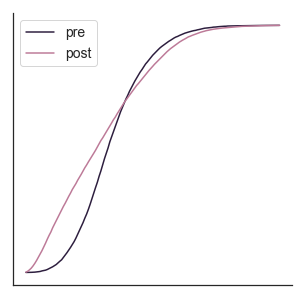

<Figure size 504x504 with 0 Axes>

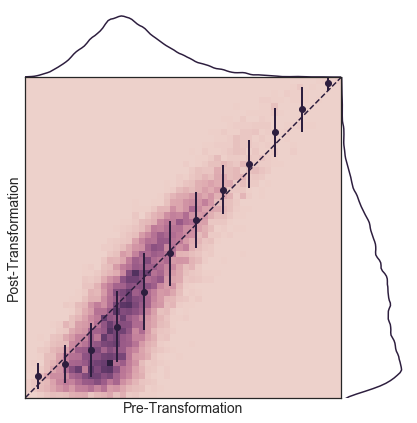

In [65]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

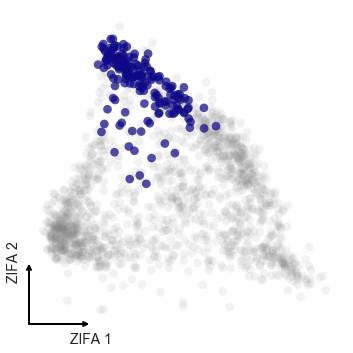

In [66]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_ZIFA.plot_barcodes(ranks=['3']) # mature goblet cells

In [67]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7952
EMD: 0.0617
KLD: 0.103
Knn Pres.: 85.6817
CPU times: user 452 ms, sys: 26.9 ms, total: 479 ms
Wall time: 509 ms


CPU times: user 18.1 s, sys: 401 ms, total: 18.5 s
Wall time: 18.1 s


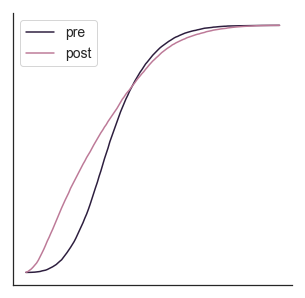

<Figure size 504x504 with 0 Axes>

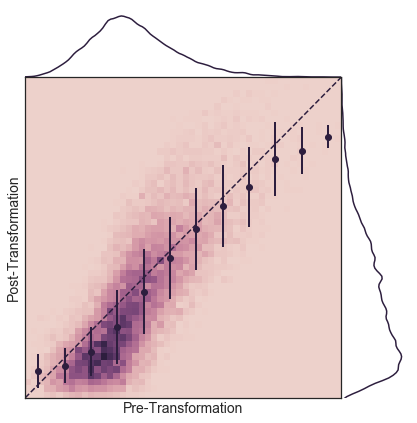

In [68]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

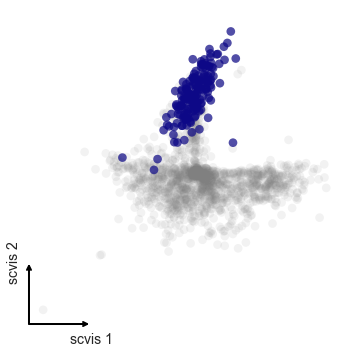

In [69]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scvis.plot_barcodes(ranks=['3']) # mature goblet cells

In [70]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8631
EMD: 0.0237
KLD: 0.0577
Knn Pres.: 94.9481
CPU times: user 400 ms, sys: 14.3 ms, total: 414 ms
Wall time: 421 ms


CPU times: user 17.9 s, sys: 387 ms, total: 18.3 s
Wall time: 17.9 s


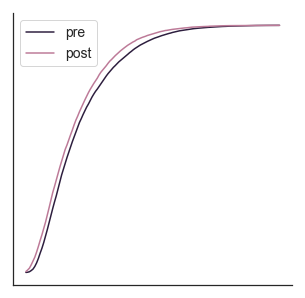

<Figure size 504x504 with 0 Axes>

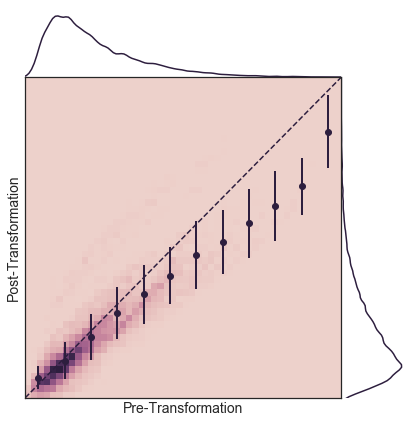

In [71]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

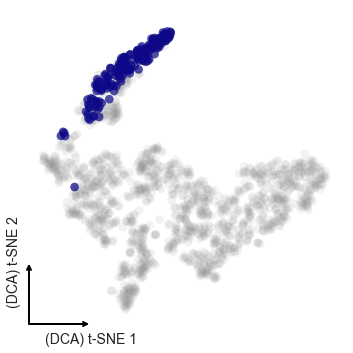

In [72]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv.gz', name='DCA', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_DCA_tSNE = DR.from_file('pymethods_out/colon_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_DCA_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [73]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.8349
EMD: 0.0159
KLD: 0.0935
Knn Pres.: 81.4671
CPU times: user 450 ms, sys: 17 ms, total: 467 ms
Wall time: 474 ms


CPU times: user 17.8 s, sys: 396 ms, total: 18.2 s
Wall time: 17.7 s


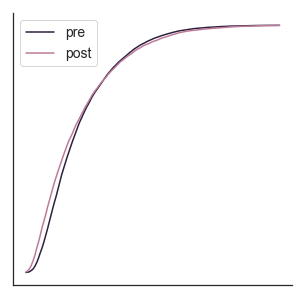

<Figure size 504x504 with 0 Axes>

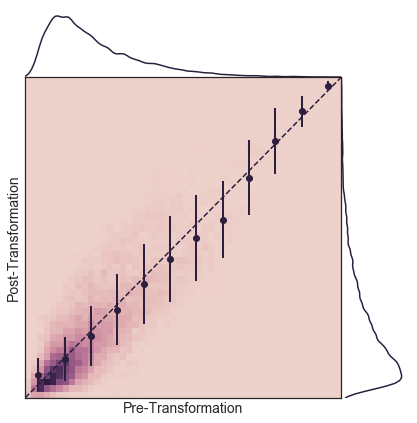

In [74]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

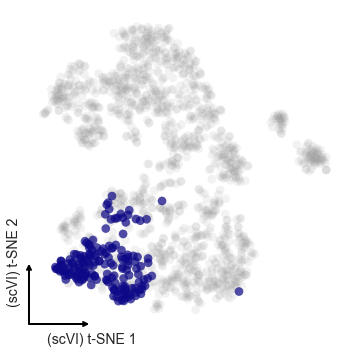

In [75]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [76]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.2994
EMD: 0.1424
KLD: 0.2078
Knn Pres.: 73.8754
CPU times: user 436 ms, sys: 19.9 ms, total: 456 ms
Wall time: 466 ms


CPU times: user 18.1 s, sys: 419 ms, total: 18.5 s
Wall time: 18.1 s


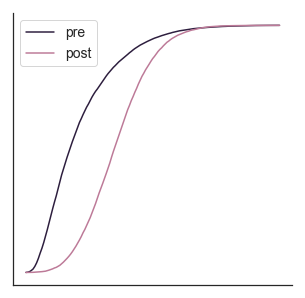

<Figure size 504x504 with 0 Axes>

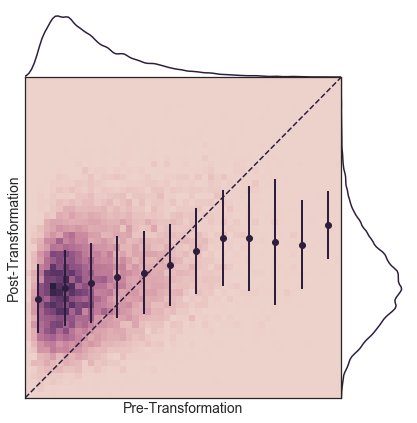

In [77]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

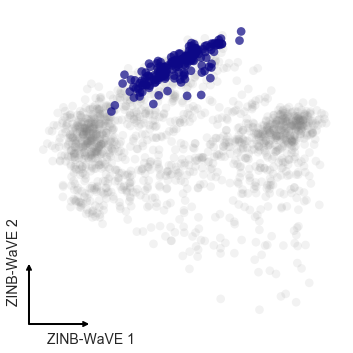

In [78]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv.gz', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3']) # mature goblet cells

In [79]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINBWAVE'], final_distance_stats['Colon']['EMD']['ZINBWAVE'], final_distance_stats['Colon']['KLD']['ZINBWAVE'], final_distance_stats['Colon']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.4924
EMD: 0.018
KLD: 0.236
Knn Pres.: 75.7647
CPU times: user 424 ms, sys: 16 ms, total: 440 ms
Wall time: 448 ms


CPU times: user 17.7 s, sys: 379 ms, total: 18.1 s
Wall time: 17.5 s


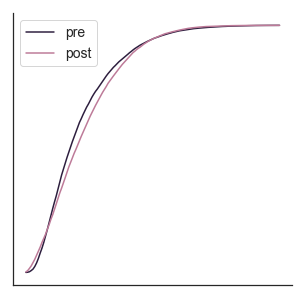

<Figure size 504x504 with 0 Axes>

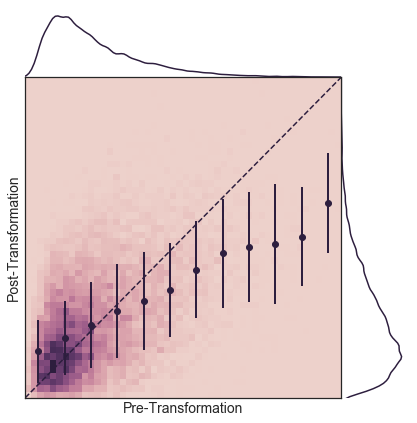

In [80]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

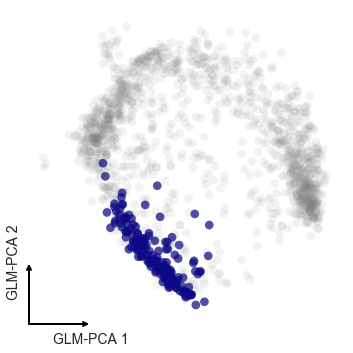

In [81]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv.gz', name='GLM-PCA', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_GLMPCA.plot_barcodes(ranks=['3']) # mature goblet cells

In [82]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLMPCA'], final_distance_stats['Colon']['EMD']['GLMPCA'], final_distance_stats['Colon']['KLD']['GLMPCA'], final_distance_stats['Colon']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.3954
EMD: 0.0438
KLD: 0.2842
Knn Pres.: 75.5571
CPU times: user 386 ms, sys: 17.2 ms, total: 403 ms
Wall time: 416 ms


CPU times: user 17.9 s, sys: 412 ms, total: 18.3 s
Wall time: 17.8 s


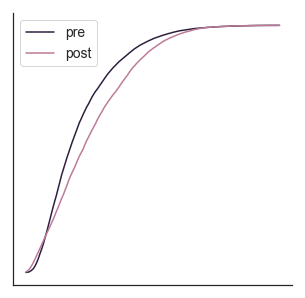

<Figure size 504x504 with 0 Axes>

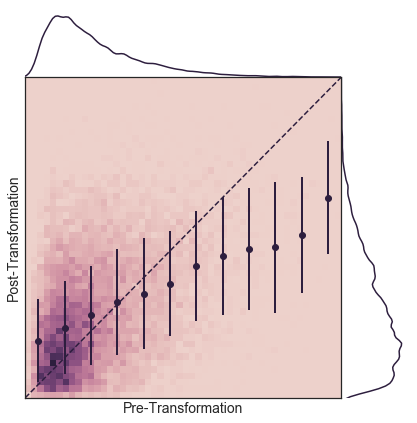

In [83]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

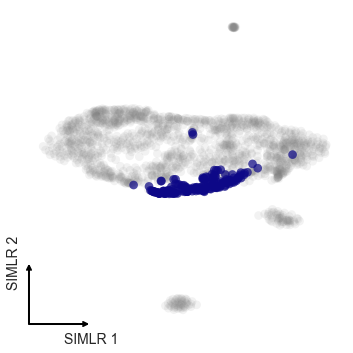

In [84]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_SIMLR_2D = DR.from_file('Rmethods_out/colon_SIMLR_ydata.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_SIMLR_2D.plot_barcodes(ranks=['3']) # mature goblet cells

In [85]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.5327
EMD: 0.0677
KLD: 0.2135
Knn Pres.: 73.8754
CPU times: user 443 ms, sys: 18.6 ms, total: 461 ms
Wall time: 477 ms


CPU times: user 18 s, sys: 378 ms, total: 18.3 s
Wall time: 18 s


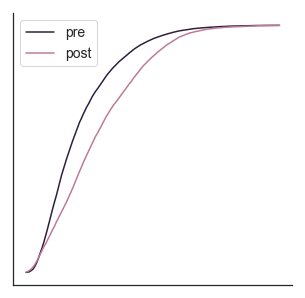

<Figure size 504x504 with 0 Axes>

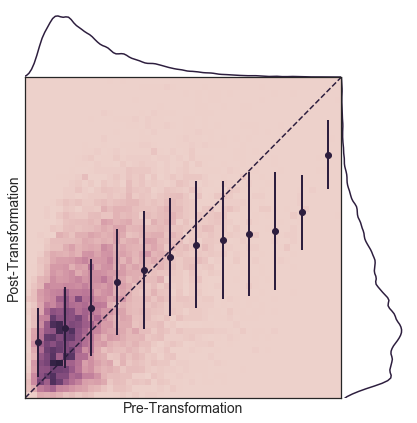

In [86]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)